## Import Libraries

In [6]:
from transformers import pipeline

## Sentiment Analysis

In [10]:
classifier = pipeline("sentiment-analysis")
classifier([
    "Anakin: I hate you!!!",
    "Obi-Wan: You were my brother, Anakin.",
    "This movie was similar to my second grade theater project, it was that goofy.",
    "I enojoyed hating this piece of work.",
    "I secretly like the girl in my English class.",
    "Their attempts were worthy of nothing."
    ])

No model was supplied, defaulted to distilbert/distilbert-base-uncased-finetuned-sst-2-english and revision 714eb0f (https://huggingface.co/distilbert/distilbert-base-uncased-finetuned-sst-2-english).
Using a pipeline without specifying a model name and revision in production is not recommended.
Device set to use cuda:0


[{'label': 'NEGATIVE', 'score': 0.9528654217720032},
 {'label': 'POSITIVE', 'score': 0.9929565191268921},
 {'label': 'NEGATIVE', 'score': 0.978518009185791},
 {'label': 'NEGATIVE', 'score': 0.9962259531021118},
 {'label': 'POSITIVE', 'score': 0.9989116191864014},
 {'label': 'NEGATIVE', 'score': 0.9993733763694763}]

## Zero-Shot Classification

In [13]:
classifier = pipeline("zero-shot-classification")
classifier(
    [
    "I do not care that much to be honest.",
    "Having a crush on here was an interesting experience",
    "Anakin did not seem to like Obi-Wan that much.",
    "Hey man, do not come knocking my door now!"
    ],
    candidate_labels=["love", "hate", "neutral"],
)


No model was supplied, defaulted to facebook/bart-large-mnli and revision d7645e1 (https://huggingface.co/facebook/bart-large-mnli).
Using a pipeline without specifying a model name and revision in production is not recommended.
Device set to use cuda:0


[{'sequence': 'I do not care that much to be honest.',
  'labels': ['neutral', 'hate', 'love'],
  'scores': [0.9644615650177002, 0.022572334855794907, 0.012966099195182323]},
 {'sequence': 'Having a crush on here was an interesting experience',
  'labels': ['love', 'neutral', 'hate'],
  'scores': [0.9157457947731018, 0.053213831037282944, 0.0310403723269701]},
 {'sequence': 'Anakin did not seem to like Obi-Wan that much.',
  'labels': ['hate', 'neutral', 'love'],
  'scores': [0.7447167038917542, 0.17556828260421753, 0.0797150731086731]},
 {'sequence': 'Hey man, do not come knocking my door now!',
  'labels': ['hate', 'neutral', 'love'],
  'scores': [0.7257632613182068, 0.2415904849767685, 0.032646294683218]}]

## Text Generation

In [17]:
generator = pipeline("text-generation")
print(generator("I aim to apply for a summer"))
print(generator("I aim to apply for a summer"))
print(generator("I aim to apply for a summer"))

No model was supplied, defaulted to openai-community/gpt2 and revision 607a30d (https://huggingface.co/openai-community/gpt2).
Using a pipeline without specifying a model name and revision in production is not recommended.
Device set to use cuda:0
Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.
Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.


[{'generated_text': 'I aim to apply for a summer internship at the University of Oregon in the next 30 calendar years.\n\n"If I didn\'t enjoy this job, I probably would have had to wait till next summer or so to be considered for other jobs.'}]


Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.


[{'generated_text': 'I aim to apply for a summer position in December. It is my view that there are no options if I are not fit for this positions."\n\nHowever, he admits that there are several opportunities available to offer such services. "I also believe'}]
[{'generated_text': 'I aim to apply for a summer-specific residency permit as soon as this new location opens.\n\nThe only way to find out what is being taught is to call the "International Students Affairs Building" by using this information only. The building,'}]


## Question Answering Using a HugginFace Hub Model

In [18]:
qa_model = pipeline("question-answering", "timpal0l/mdeberta-v3-base-squad2")
question = "What is my struggle?"
context = "I want to become a great computer scientist, however learning large scale Machine Learning projects are difficult to understand."
qa_model(question = question, context = context)

config.json:   0%|          | 0.00/879 [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/1.11G [00:00<?, ?B/s]

tokenizer_config.json:   0%|          | 0.00/453 [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/16.3M [00:00<?, ?B/s]

added_tokens.json:   0%|          | 0.00/23.0 [00:00<?, ?B/s]

special_tokens_map.json:   0%|          | 0.00/173 [00:00<?, ?B/s]

Device set to use cuda:0


{'score': 0.1231241449713707,
 'start': 52,
 'end': 128,
 'answer': ' learning large scale Machine Learning projects are difficult to understand.'}

## Text to Image Using a Hub Model

Loading pipeline components...:   0%|          | 0/7 [00:00<?, ?it/s]

  0%|          | 0/50 [00:00<?, ?it/s]

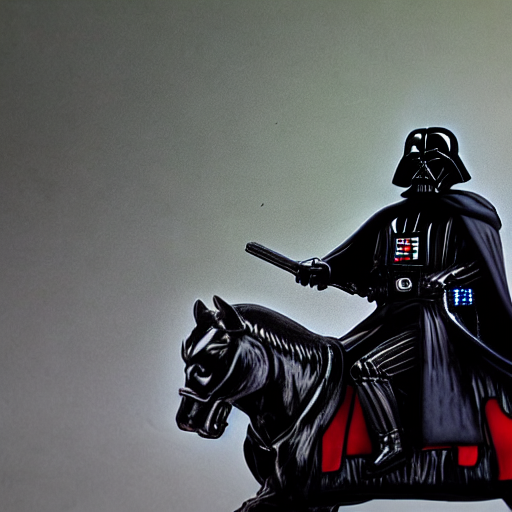

In [24]:
import torch
from diffusers import StableDiffusionPipeline
from IPython.display import display

model_id = "CompVis/stable-diffusion-v1-4"
device = "cuda"


pipe = StableDiffusionPipeline.from_pretrained(model_id, torch_dtype=torch.float16)
pipe = pipe.to(device)

prompt = "Darth Vader riding a horse"
image = pipe(prompt).images[0]

display(image)